In [2]:
# PyData London 2018 proposal demo
# Mr Bean visits CNNs: A visual story
# Amaryta Ranjan Saikia (ar5saikia [at] gmail [dot] com)

# ResNet50

import os,cv2,time  #image path & image processing
import numpy as np #arrays
import matplotlib.pyplot as plt #plotting

In [3]:
from sklearn.utils import shuffle #to shuffle data
from sklearn.cross_validation import train_test_split #to split data into train-test set


C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from keras.applications.resnet50 import ResNet50 #model
from keras.preprocessing import image #for image processing
from keras.layers import GlobalAveragePooling2D, Dense, Dropout,Activation,Flatten #CNN layers

from imagenet_utils import preprocess_input #imagenet_util
from keras.layers import Input
from keras.models import Model #Model
from keras.utils import np_utils #converts class vector to binary matrix

Using TensorFlow backend.


In [31]:
PATH = os.getcwd()
data_path = PATH + '/data'
data_dir_list = os.listdir(data_path)

img_data_list=[]

for dataset in data_dir_list:
	img_list = os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		img_path = data_path + '/'+ dataset + '/'+ img
		img = image.load_img(img_path, target_size=(224, 224)) #ResNet size
		x = image.img_to_array(img)
		x = np.expand_dims(x, axis=0)
		x = preprocess_input(x) #Preprocesses a tensor encoding a batch of images.
		print('Input image shape:', x.shape)
		img_data_list.append(x)

Loaded the images of dataset-1_Bean

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224,

C:\Users\User\Anaconda3\lib\site-packages\PIL\Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 

In [7]:
img_data = np.array(img_data_list) #convert to numpy array

img_data = img_data.astype('float32')
print (img_data.shape)

img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)

img_data = img_data[0]
print (img_data.shape)

(140, 1, 224, 224, 3)
(1, 140, 224, 224, 3)
(140, 224, 224, 3)


In [8]:
# Define the number of classes
num_classes = 2
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:69]=0
labels[70:]=1

names = ['Mr. bean','Lion']

Y = np_utils.to_categorical(labels, num_classes) #on-hot encoding

x,y = shuffle(img_data,Y, random_state=2) #Shuffle the dataset

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2) # Split the dataset

In [39]:
image_input = Input(shape=(224, 224, 3))

model = ResNet50(input_tensor=image_input, include_top=True,weights='imagenet') #weights from imagenet

In [40]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [12]:
#Modify the ResNet50

last_layer = model.get_layer('avg_pool').output
x= Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='output_layer')(x)
custom_resnet_model = Model(inputs=image_input,outputs= out)
custom_resnet_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [13]:
#model summary holds the information
for layer in custom_resnet_model.layers[:-1]:
	layer.trainable = False

custom_resnet_model.layers[-1].trainable

custom_resnet_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

t = time.time()
hist = custom_resnet_model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_resnet_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Train on 112 samples, validate on 28 samples
Epoch 1/10
112/112 [==============================] - 7s 62ms/step - loss: 0.4311 - acc: 0.8571 - val_loss: 0.2452 - val_acc: 0.8929
Epoch 2/10
112/112 [==============================] - 3s 24ms/step - loss: 0.1717 - acc: 0.9643 - val_loss: 0.1638 - val_acc: 0.9643
Epoch 3/10
112/112 [==============================] - 2s 22ms/step - loss: 0.0431 - acc: 1.0000 - val_loss: 0.1922 - val_acc: 0.9643
Epoch 4/10
112/112 [==============================] - 2s 22ms/step - loss: 0.0202 - acc: 1.0000 - val_loss: 0.2216 - val_acc: 0.9643
Epoch 5/10
112/112 [==============================] - 2s 22ms/step - loss: 0.0154 - acc: 1.0000 - val_loss: 0.2382 - val_acc: 0.9643
Epoch 6/10
112/112 [==============================] - 2s 22ms/step - loss: 0.0097 - acc: 1.0000 - val_loss: 0.2368 - val_acc: 0.9643
Epoch 7/10
112/112 [==============================] - 2s 22ms/step - loss: 0.0136 - acc: 1.0000 - val_loss: 0.2403 - val_acc: 0.9643
Epoch 8/10
112/112 [====

In [15]:
# Accuracy of 96.4286
# Good !

In [16]:
#Now we test the softmax probabilities for the two Mr. bean images

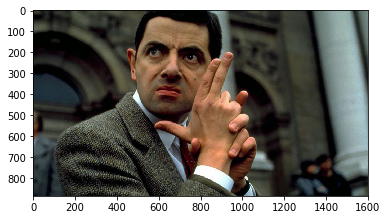

In [17]:
# This image is new and isn't available in train-test dataset
im1 = cv2.imread("bean_a.jpg")
im1 = cv2.cvtColor(im1,cv2.COLOR_BGR2RGB)
plt.imshow(im1)
plt.show()

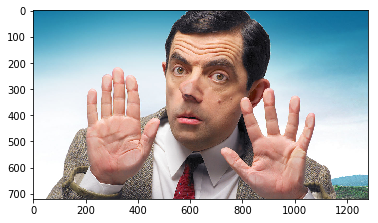

In [18]:
# Lets read another image
im1 = cv2.imread("bean_b.jpg")
im1 = cv2.cvtColor(im1,cv2.COLOR_BGR2RGB)
plt.imshow(im1)
plt.show()

In [36]:
test_image = cv2.imread('bean_a.jpg')
test_image = cv2.resize(test_image,(224,224))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
test_image= np.expand_dims(test_image, axis=0)
print (test_image.shape)

(224, 224, 3)
(1, 224, 224, 3)
